## Normal dağılım için Olasılık Yoğunluk Fonksiyonu oluşturalım. Bunun için numpy kütüphanesinden linspace() fonksiyonu ile $x$ değerlerini, scipy.stats kütüphanesinin norm modülündeki pdf (probability density function) fonksiyonu ile de $y$ değerlerini oluşturacağız. Böylece normal dağılım için Olasılık Yoğunluk Fonksiyonu oluşturmuş olacağız.

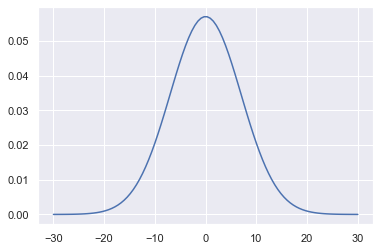

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import seaborn as sns
sns.set()

mu=0
sigma = 7
x = np.linspace(-30, 30, 100)
y = norm.pdf(x, mu, sigma)
plt.plot(x,y)
plt.show()

## Normal olarak dağılmış bir değişken oluşturmak için numpy kütüphanesinin random modülündeki norm() fonksiyonunu kullanabiliriz. Bunun için bir ortalama (μ), standart sapma (σ) ve gözlem sayısını (n) belirlemek yetecektir. 10000 gözleme sahip, ortalaması 0 ve standart sapması 1 olan normal dağılmış bir veri üretelim ve histogramını çizelim.

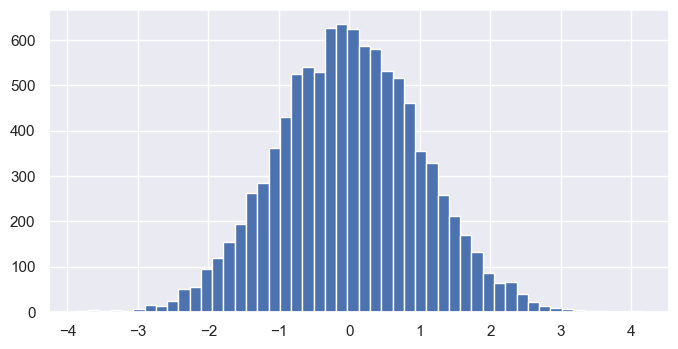

In [39]:
import pandas as pd
mu = 0 
sigma = 1
n = 10000
plt.figure(figsize=(8,4), dpi = 100)
orneklem =  np.random.normal(mu, sigma, n)
plt.hist(orneklem, bins = 50)
plt.show()

## dağılım = np.random.dağılım_adı([],[]) kodunu kullanarak, dağılım_adı yazan yere seçtiğiniz bir dağılımı ve parantez içinde [] şeklinde gösterilen boşlukları yine kendi seçiminiz doğrultusunda doldurun. Daha sonra, a) Verinin histogramını çiziniz b) Q-Q grafiğini çizip yorumlayınız

In [40]:
random_data = np.random.normal(50,10,(100))

In [41]:
df = pd.DataFrame(random_data)

(array([ 1.,  3.,  2.,  6., 19., 23., 15., 13., 15.,  3.]),
 array([23.6484309 , 28.15689929, 32.66536768, 37.17383606, 41.68230445,
        46.19077284, 50.69924122, 55.20770961, 59.71617799, 64.22464638,
        68.73311477]),
 <BarContainer object of 10 artists>)

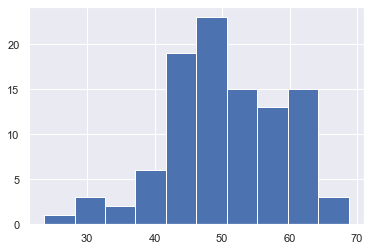

In [42]:
plt.hist(df)

In [43]:
from scipy import stats

In [44]:
plt.figure(figsize=(2,2),dpi=200)

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

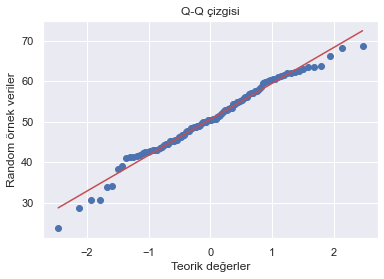

In [45]:
res = stats.probplot(random_data,plot=plt)
plt.title("Q-Q çizgisi")
plt.ylabel("Random örnek veriler")
plt.xlabel("Teorik değerler")
plt.show()

In [47]:
print("Random ürettiğimiz veriler normal dağılıma çok yakın bir dağılım izliyor.")

Random ürettiğimiz veriler normal dağılıma çok yakın bir dağılım izliyor.
